---

# Reconhecimento de Padrões - SIN492

## Projeto prático - Período de Verão 2024-0
### Sistemas de Informação, Universidade Federal de Viçosa - Campus Rio Paranaíba 

### Alunas:
 - Sabrina Dias Guimarães - 7639
 - Thalyta Maely Correa - 6392
 - Viviane Renizia Mendes Silva - 5209

### Professores:
 - Profª. Me. Larissa Ferreira Rodrigues Moreira
 - Prof. Me. Leandro Henrique Furtado P. Silva

---

## Reconhecimento de Padrões - Inteligência Artificial
O reconhecimento de padrões é um conceito fundamental em *machine learning*, e é essencial na criação de sistemas que podem aprender e tomar decisões com base em dados. Essa tecnologia permite que os computadores identifiquem padrões e regularidades em conjuntos de dados, possibilitando a classificação, a previsão e a identificação de tendências.

No reconhecimento de padrões, os algoritmos de aprendizado de máquina analisam e comparam dados para encontrar semelhanças ou diferenças. Isso pode ser aplicado em diversos campos, como reconhecimento facial, análise de sentimentos, diagnóstico médico e processamento de linguagem natural.


Os sistemas de reconhecimento de padrões são treinados usando grandes conjuntos de dados, nos quais aprendem a identificar correlações e características importantes. Uma vez treinados, esses sistemas podem aplicar esse conhecimento para interpretar novos dados, fazendo previsões ou identificando categorias relevantes.



| A eficácia do reconhecimento de padrões depende da qualidade e da quantidade dos dados utilizados no treinamento, assim como da precisão dos algoritmos. Com o avanço da inteligência artificial, o reconhecimento de padrões está se tornando cada vez mais sofisticado, permitindo aplicações mais complexas e precisas em uma variedade de indústrias. | ![Pattern Recognition](img/pattern_rec.jpg) |
| ----------------- | ------------------------------------------------------------ |
---

## Base de dados fornecida
A base de dados [dataset_SIN492.parquet](https://drive.google.com/file/d/1haNcYaDGCMbZAX3jmX_5pkkYraQ0Wdwa/view) possui 466 entradas e é composta inicialmente por 16 features (feature0, feature1, ..., feature15) e uma coluna target que corresponde a classe. A coluna target é *zero* indicando a não ocorrência do evento que deseja-se prever e *um* quando ha ocorrência do evento que deseja-se prever.

---

## Objetivos
- Praticar e aprimorar conceitos de Reconhecimento de Padrões.
- Solidificar conceitos de gerenciamento de projetos e sua implementacão (Full Stack).
- Induzir o aprendizado e pratica da escrita científica.
- Aprimorar as capacidades de programacão
  
---

## Atividades
- Analise exploratória dos dados.
- Preparacão dos dados.
- Modelagem.
- Avaliacão e Performance dos Modelos.
- Interpretação dos Resultados.
- Entrega do Projeto.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("viridis"))

---
## Análise dos Dados

Antes de iniciar qualquer análise, é necessário verificar a estrutura do  *dataset*. Desse modo, serão analisadas as 5 primeiras entradas:

In [2]:
file_path = 'data/dataset_SIN492.parquet'

df = pd.read_parquet(file_path)

# Apenas salvando uma versão .csv do arquivo
df.to_csv("data/dataset_SIN492.csv", index=False)

df.head(5)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
266,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
236,50.0,23,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
274,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
208,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


Após verificar a estrutura do *dataset*, podemos observar que:

O conjunto possui várias colunas nomeadas desde 'feature0' até 'feature15', além de uma coluna 'target'. Os valores nessas colunas são numéricos e variam significativamente em magnitude, sugerindo que o conjunto de dados pode conter diferentes tipos de características (features), possivelmente de diferentes domínios ou métricas (medidas).

Precisamos entender o significado e a origem de cada característica para realizar uma análise mais aprofundada. Além disso, devemos realizar uma etapa de pré-processamento dos dados, como normalização ou padronização, principalmente considerando o objetivo de utilizar um modelo de aprendizado de máquina, que são modelos sensíveis à escala dos dados.

O índice do dataframe está estranho, como se linhas tivessem sido removidas, ou filtradas antes de salvar o arquivo, vamos redefinir o índice.


### **Redefinindo o índice**

In [3]:
df.reset_index(drop=True, inplace=True)
df.head(5)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
1,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
2,50.0,23,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
3,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
4,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


### **Quantidade de atributos (variáveis) e de entradas do conjunto de dados**

In [4]:
print(f'Entradas no DataFrame: {df.shape[0]} linhas no total')
print(f'Variáveis no DataFrame: {df.shape[1]} colunas no total')

Entradas no DataFrame: 466 linhas no total
Variáveis no DataFrame: 17 colunas no total


### **Verificando o tipo dos dados**

In [5]:
display(df.dtypes)

feature0     float64
feature1       int64
feature2     float64
feature3     float64
feature4     float64
feature5     float64
feature6       int64
feature7     float64
feature8     float64
feature9       int64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15      int64
target         int64
dtype: object

### **Porcentagem de valores ausentes no *dataset***

In [6]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Variáveis faltantes': missing_values, 'Porcentagem': missing_values_percentage})
missing_df.sort_values(by='Porcentagem', ascending=False)

,Variáveis faltantes,Porcentagem


Pode-se notar que, surpreendentemente, nenhuma variável no *dataset* apresenta valores ausentes!

### **Tipo de distribuição das variáveis** 

Será utilizado o **histograma** para identificar a distribuição das variáveis do *dataset*. 

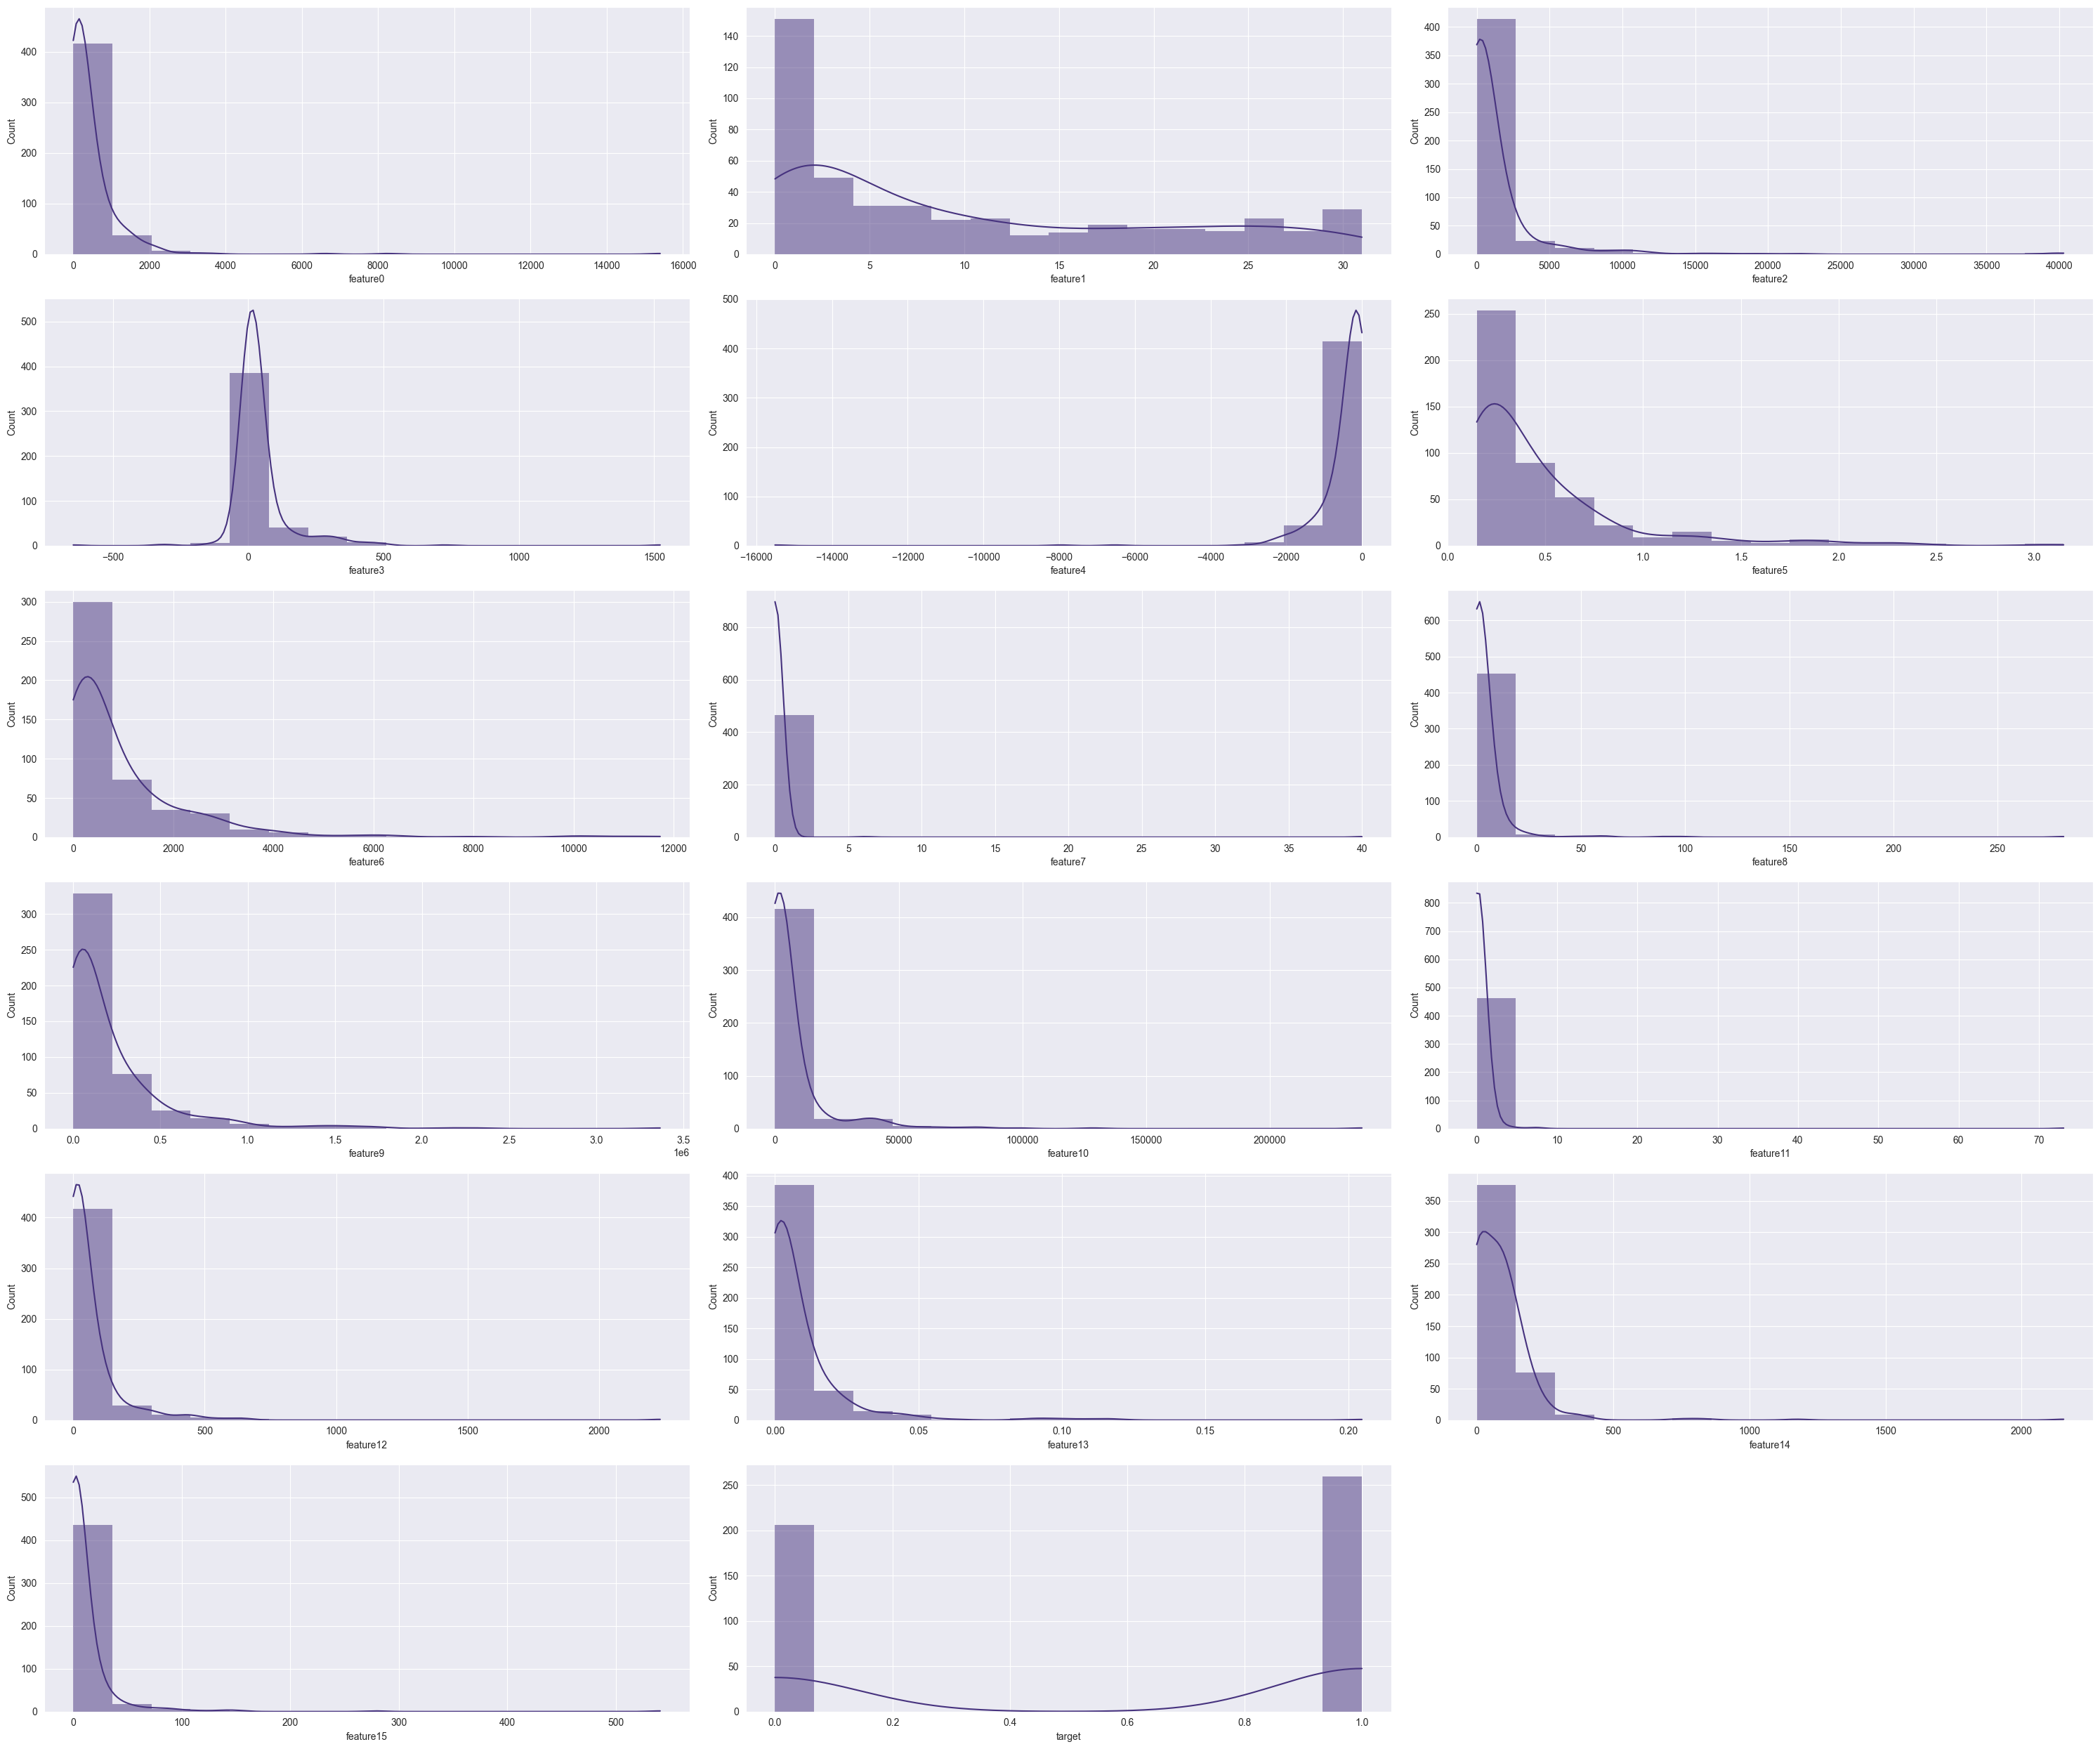

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 25))

# Obtenha colunas numéricas uma vez, para evitar recalculá-las em cada iteração
numeric_columns = df.select_dtypes(include='number').columns

for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    # Adicione edgecolor='none' para remover o contorno
    sns.histplot(df[column], bins=15, kde=True, edgecolor='none')

plt.tight_layout()
plt.show()


Os eixos dos Histogramas permitem perceber que existem uma pequena quantidade de valores muito altos, mas a linha está nos impedindo de visualizar isso por meio da barra de contagem. Vamos retirar a linha do plot (definindo kde=False) e visualizar novamente para realizar observações.

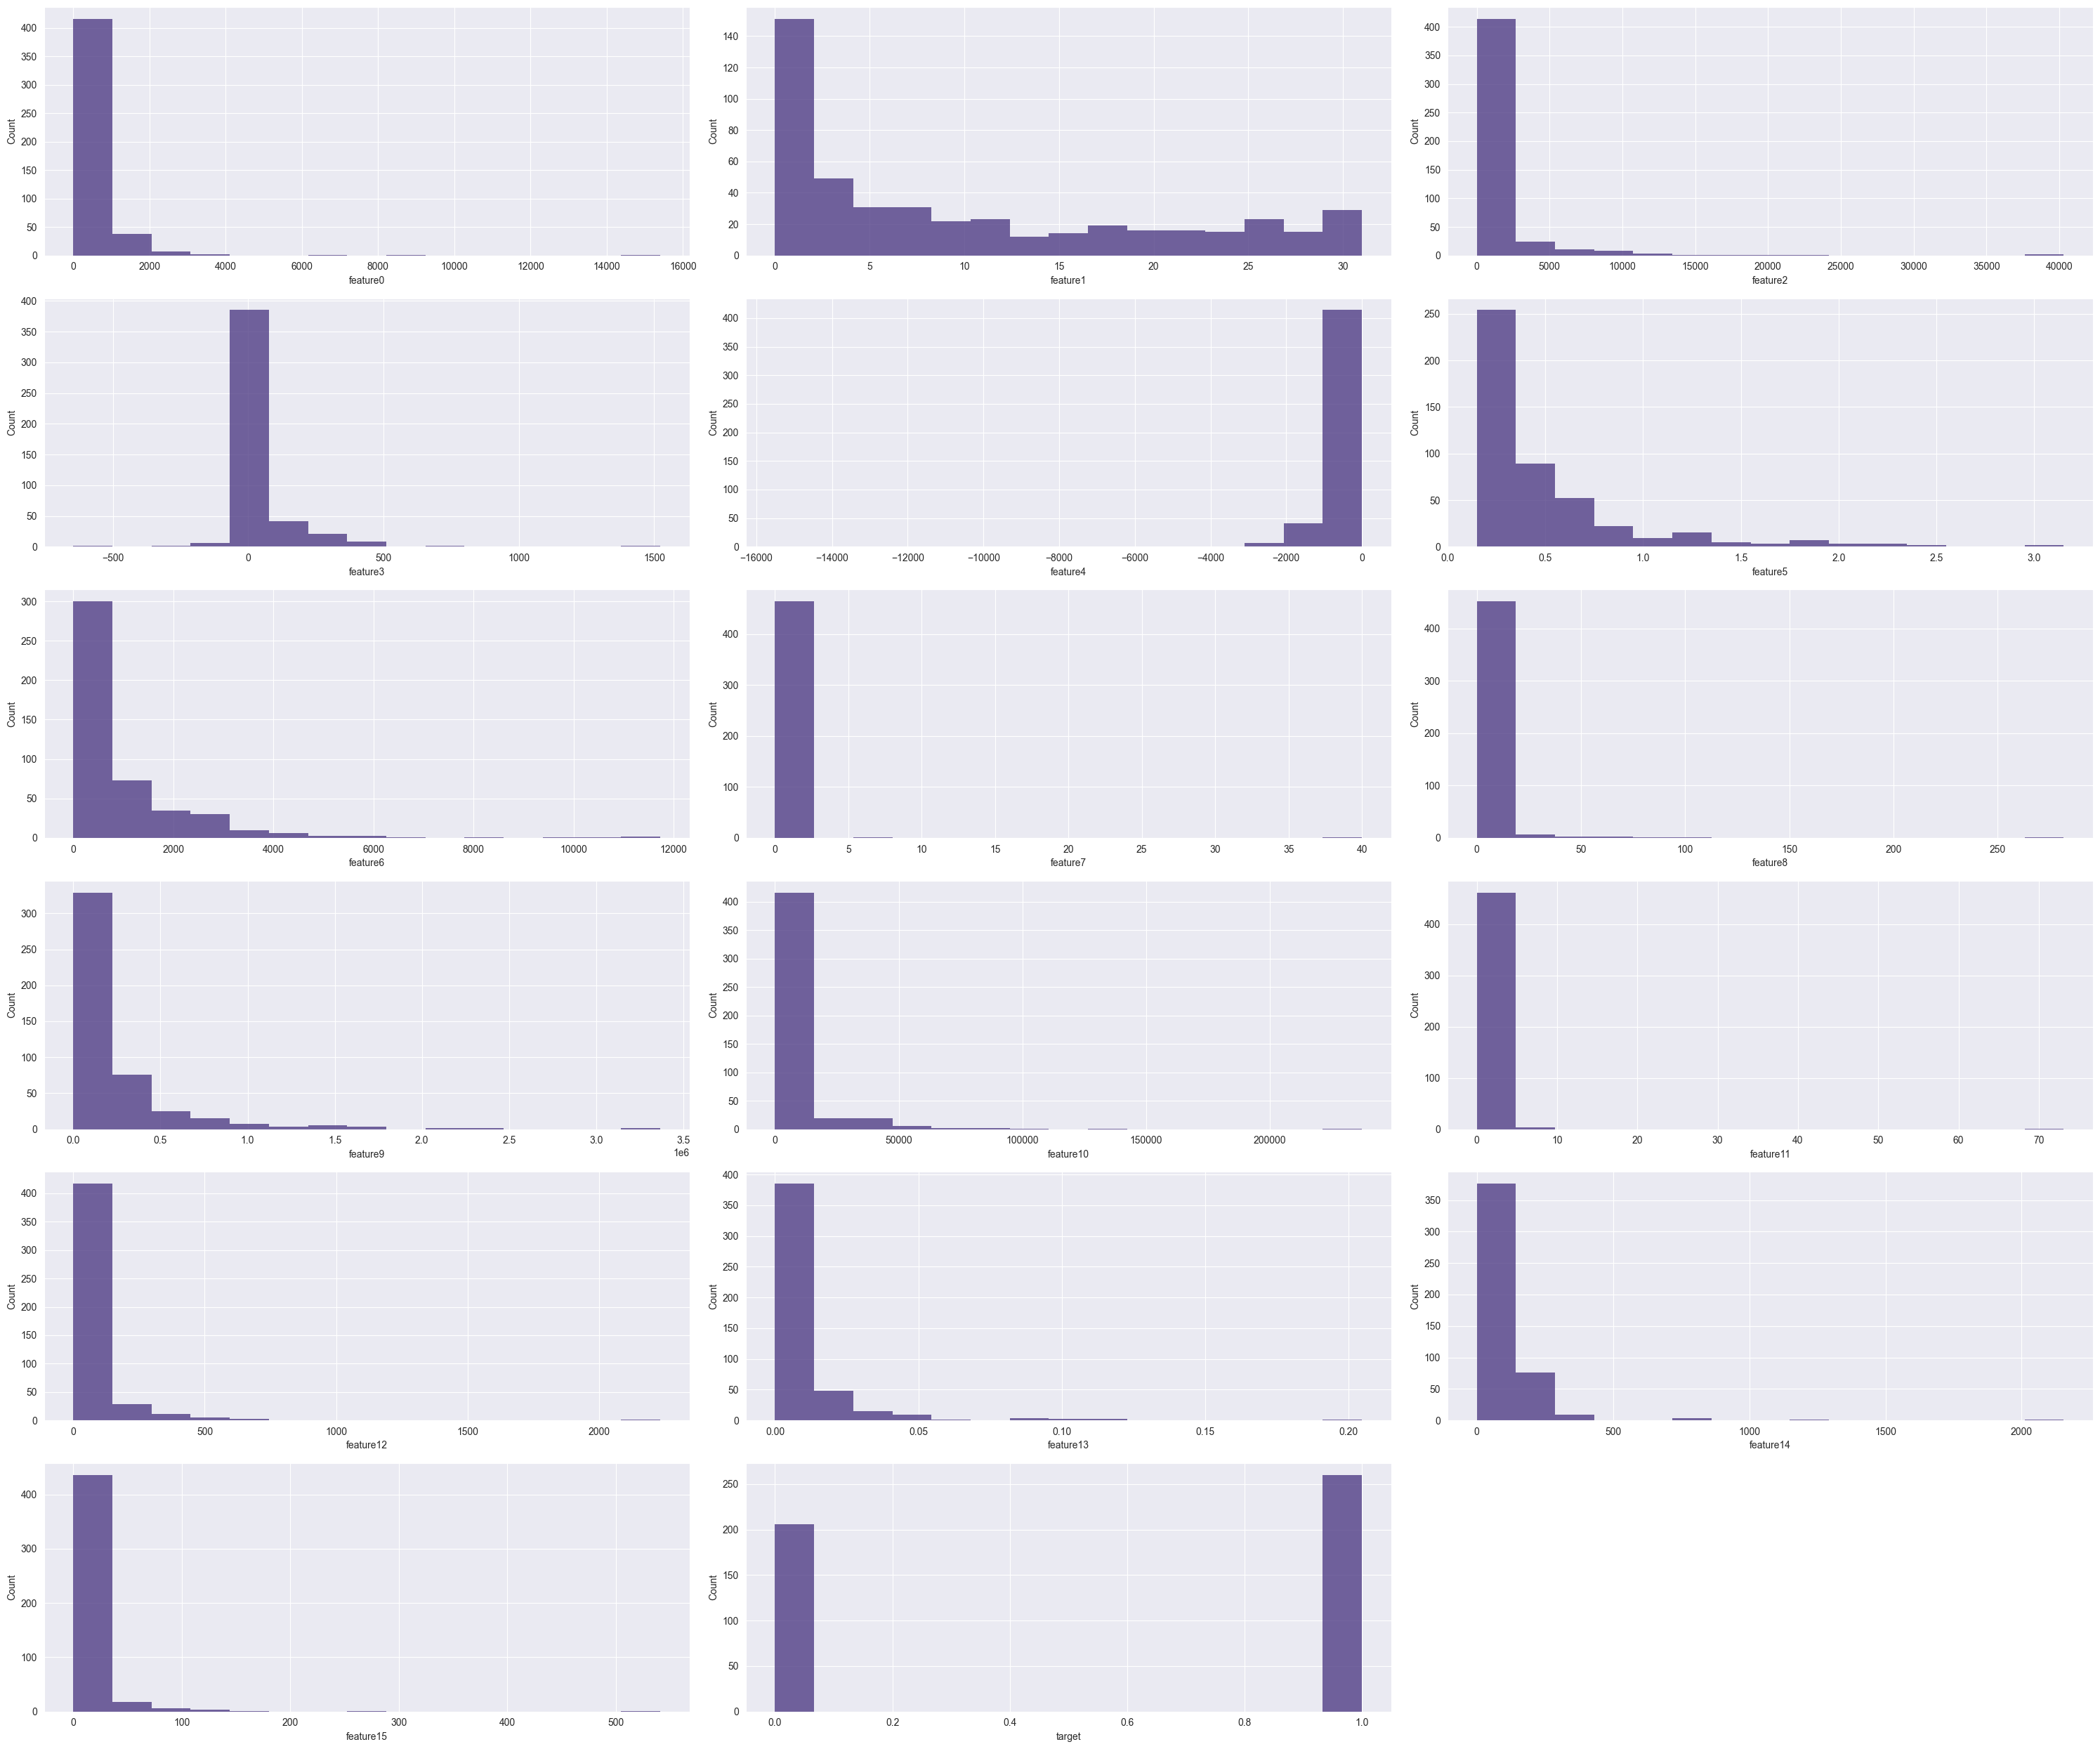

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 25))

# Obtenha colunas numéricas uma vez, para evitar recalculá-las em cada iteração
numeric_columns = df.select_dtypes(include='number').columns

for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    # Adicione edgecolor='none' para remover o contorno
    sns.histplot(df[column], bins=15, kde=False, edgecolor='none')

plt.tight_layout()
plt.show()


Com o histograma, agora sem as linhas, é possível notar que:

- feature0: Há uma pequena quantidade de valores muito mais altos que a maioria dos dados.
- feature3: Observa-se uma barra isolada à esquerda, sugerindo a presença de outliers negativos, também parece ter alguns positivos perto de 1500.
- feature4: Similar à feature0, parece haver uma concentração de valores em um extremo da distribuição.
- feature6: Apesar de a maioria dos dados estar concentrada no lado esquerdo, há valores espalhados até um valor muito alto, indicando possíveis outliers.
- feature10: A maioria dos valores está concentrada no início do histograma, mas há uma barra isolada mais à direita.
- feature12: Há uma concentração massiva de valores em um extremo e um valor isolado, indicando um possível outlier.
- feature14: Há uma concentração similar a feature12.
- feature15: Há uma concentração as feature 12 e 14.

Porém, um histograma não é a melhor forma de verificar inconsistências, por isso, vamos avançar para outras análises.

#### **Verificação de Outliers** 
***Outliers*** podem influenciar a análise de dados, já que, por serem valores que se diferenciam significativamente do restante dos dados de um *dataset*, podem influenciar a análise para um viés que não represente a realidade da melhor forma. 

Vamos verificar as observações que fizemos através do histograma com uma análise descritiva dos dados, gráficos boxplot e matriz de correlação.

#### - Análise descritiva dos dados

In [9]:
descriptive_stats = df.describe()
descriptive_stats

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,438.743562,10.257511,1244.322468,44.600880,-434.299893,0.473991,979.070815,0.113885,3.857010,2.164378e+05,6930.456438,0.437333,61.886190,0.008634,87.713360,10.313305,0.557940
std,984.593065,9.858908,3558.699033,122.093515,975.555198,0.452261,1460.738442,1.873746,15.609132,3.508622e+05,17581.800818,3.442094,142.521523,0.017866,145.426437,33.625204,0.497165
min,0.000000,0.000000,0.000000,-645.870000,-15506.350000,0.150000,1.000000,0.000663,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,2.000000,0.000000,-0.400000,-492.035000,0.173669,133.500000,0.003318,0.000000,2.113100e+04,383.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.000000,7.000000,169.830000,18.360000,-154.525000,0.303854,420.000000,0.005127,0.937082,8.532850e+04,1410.855000,0.082515,19.692568,0.003207,72.524286,2.000000,1.000000
75%,500.000000,18.000000,1017.375000,44.630000,-50.180000,0.569848,1238.750000,0.009699,2.815824,2.645035e+05,5212.977500,0.311311,65.498098,0.009515,127.301505,8.000000,1.000000
max,15400.000000,31.000000,40291.240000,1521.900000,-0.260000,3.150000,11731.000000,40.000000,281.666667,3.366472e+06,237182.780000,73.080634,2232.100000,0.204611,2154.000000,541.000000,1.000000


- **Contagem de Dados:** Cada feature tem 466.000 observações, indicando que não há valores ausentes nessas colunas, como já visto anteriormente.

- **Média:** O valor médio para cada característica varia consideravelmente, indicando diferentes escalas e distribuições. Por exemplo, a feature1 tem uma média próxima a 10, enquanto a feature10 tem uma média superior a 6000.

- **Desvio Padrão (std):** O desvio padrão também varia muito entre as features, o que sugere que a variação nos dados é bastante heterogênea, ou seja, a dispersão ou a variabilidade dos dados é muito diferente de uma característica para outra. Features com um desvio padrão alto, como a feature10, têm uma dispersão maior dos dados em torno da média.

- **Mínimo e Máximo (min, max):** Os valores mínimos e máximos revelam a amplitude dos dados. Algumas features apresentam valores negativos como mínimos, o que pode ser normal ou indicar outliers, depende do contexto.

- **Quartis (25%, 50%, 75%):** Os quartis fornecem uma visão da distribuição dos dados. O quartil de 50% é a mediana, que é o valor do meio quando os dados são ordenados. A comparação entre a mediana e a média pode indicar a assimetria (em uma distribuição simétrica, a média e a mediana seriam iguais) da distribuição dos dados.

> Quanto aos outliers, se há uma grande diferença entre o valor médio e a mediana, ou se os valores máximos/mínimos são muito distantes dos quartis Q1 e Q3, isso pode indicar a presença de outliers, vamos lidar com eles com o método IQR. Faremos também uma comparação com o método Z-Score, porém, não é um método bom para esse dataset, pois a distribuição dos dados não é normal e o Z-Score assume que a distribuição é normal em sua execução, será apenas para fins de comparação do comportamento ao se utilizar métodos corretos e incorretos para remoção de outliers de acordo com o tipo de distribuição).

**Outros pontos observados:** 

- Algumas features têm uma grande variação nos valores mínimos e máximos, por exemplo, a feature12 vai de 0 a 2322.100000, o que sugere que ela possivelmente é influenciada por outliers.

- Features com um desvio padrão relativamente pequeno comparado à média, como a feature6 com uma média de aproximadamente 3.85 e um desvio padrão de aproximadamente 1.87, podem indicar uma distribuição mais concentrada de valores, o que pode indicar uma variável com menos variabilidade.

#### - Gráficos boxplot

Vamos utilizar o gráfico boxplot para visualizar melhor as informações já obtidas e tentar identificar novos pontos. Abaixo, relatamos o funcionamento de um gráfico boxplot afim de consulta.

**Mediana** (Linha Central do Boxplot): Esta linha dentro da caixa indica a mediana dos dados, ou seja, o ponto médio. Metade dos dados está acima desta linha e a outra metade abaixo.

**Quartis:**

- Primeiro Quartil (Q1): A borda inferior da caixa marca o primeiro quartil, o valor abaixo do qual estão 25% dos dados.
- Terceiro Quartil (Q3): A borda superior da caixa marca o terceiro quartil, abaixo do qual estão 75% dos dados.

**Bigodes (Whiskers):** Estes são os traços que se estendem para fora da caixa. Eles geralmente vão até o menor e o maior valor dentro de 1.5 * IQR a partir dos quartis. Eles indicam a variação nos dados fora dos quartis centralizados.

**Outliers (Pontos Fora da Curva):** São pontos que aparecem fora dos bigodes. Eles indicam valores que são anormalmente baixos ou altos em comparação com o restante dos dados.

**Simetria:** Se a mediana divide a caixa em duas partes iguais, os dados são simétricos. Se uma parte da caixa é significativamente maior que a outra, os dados são assimétricos.

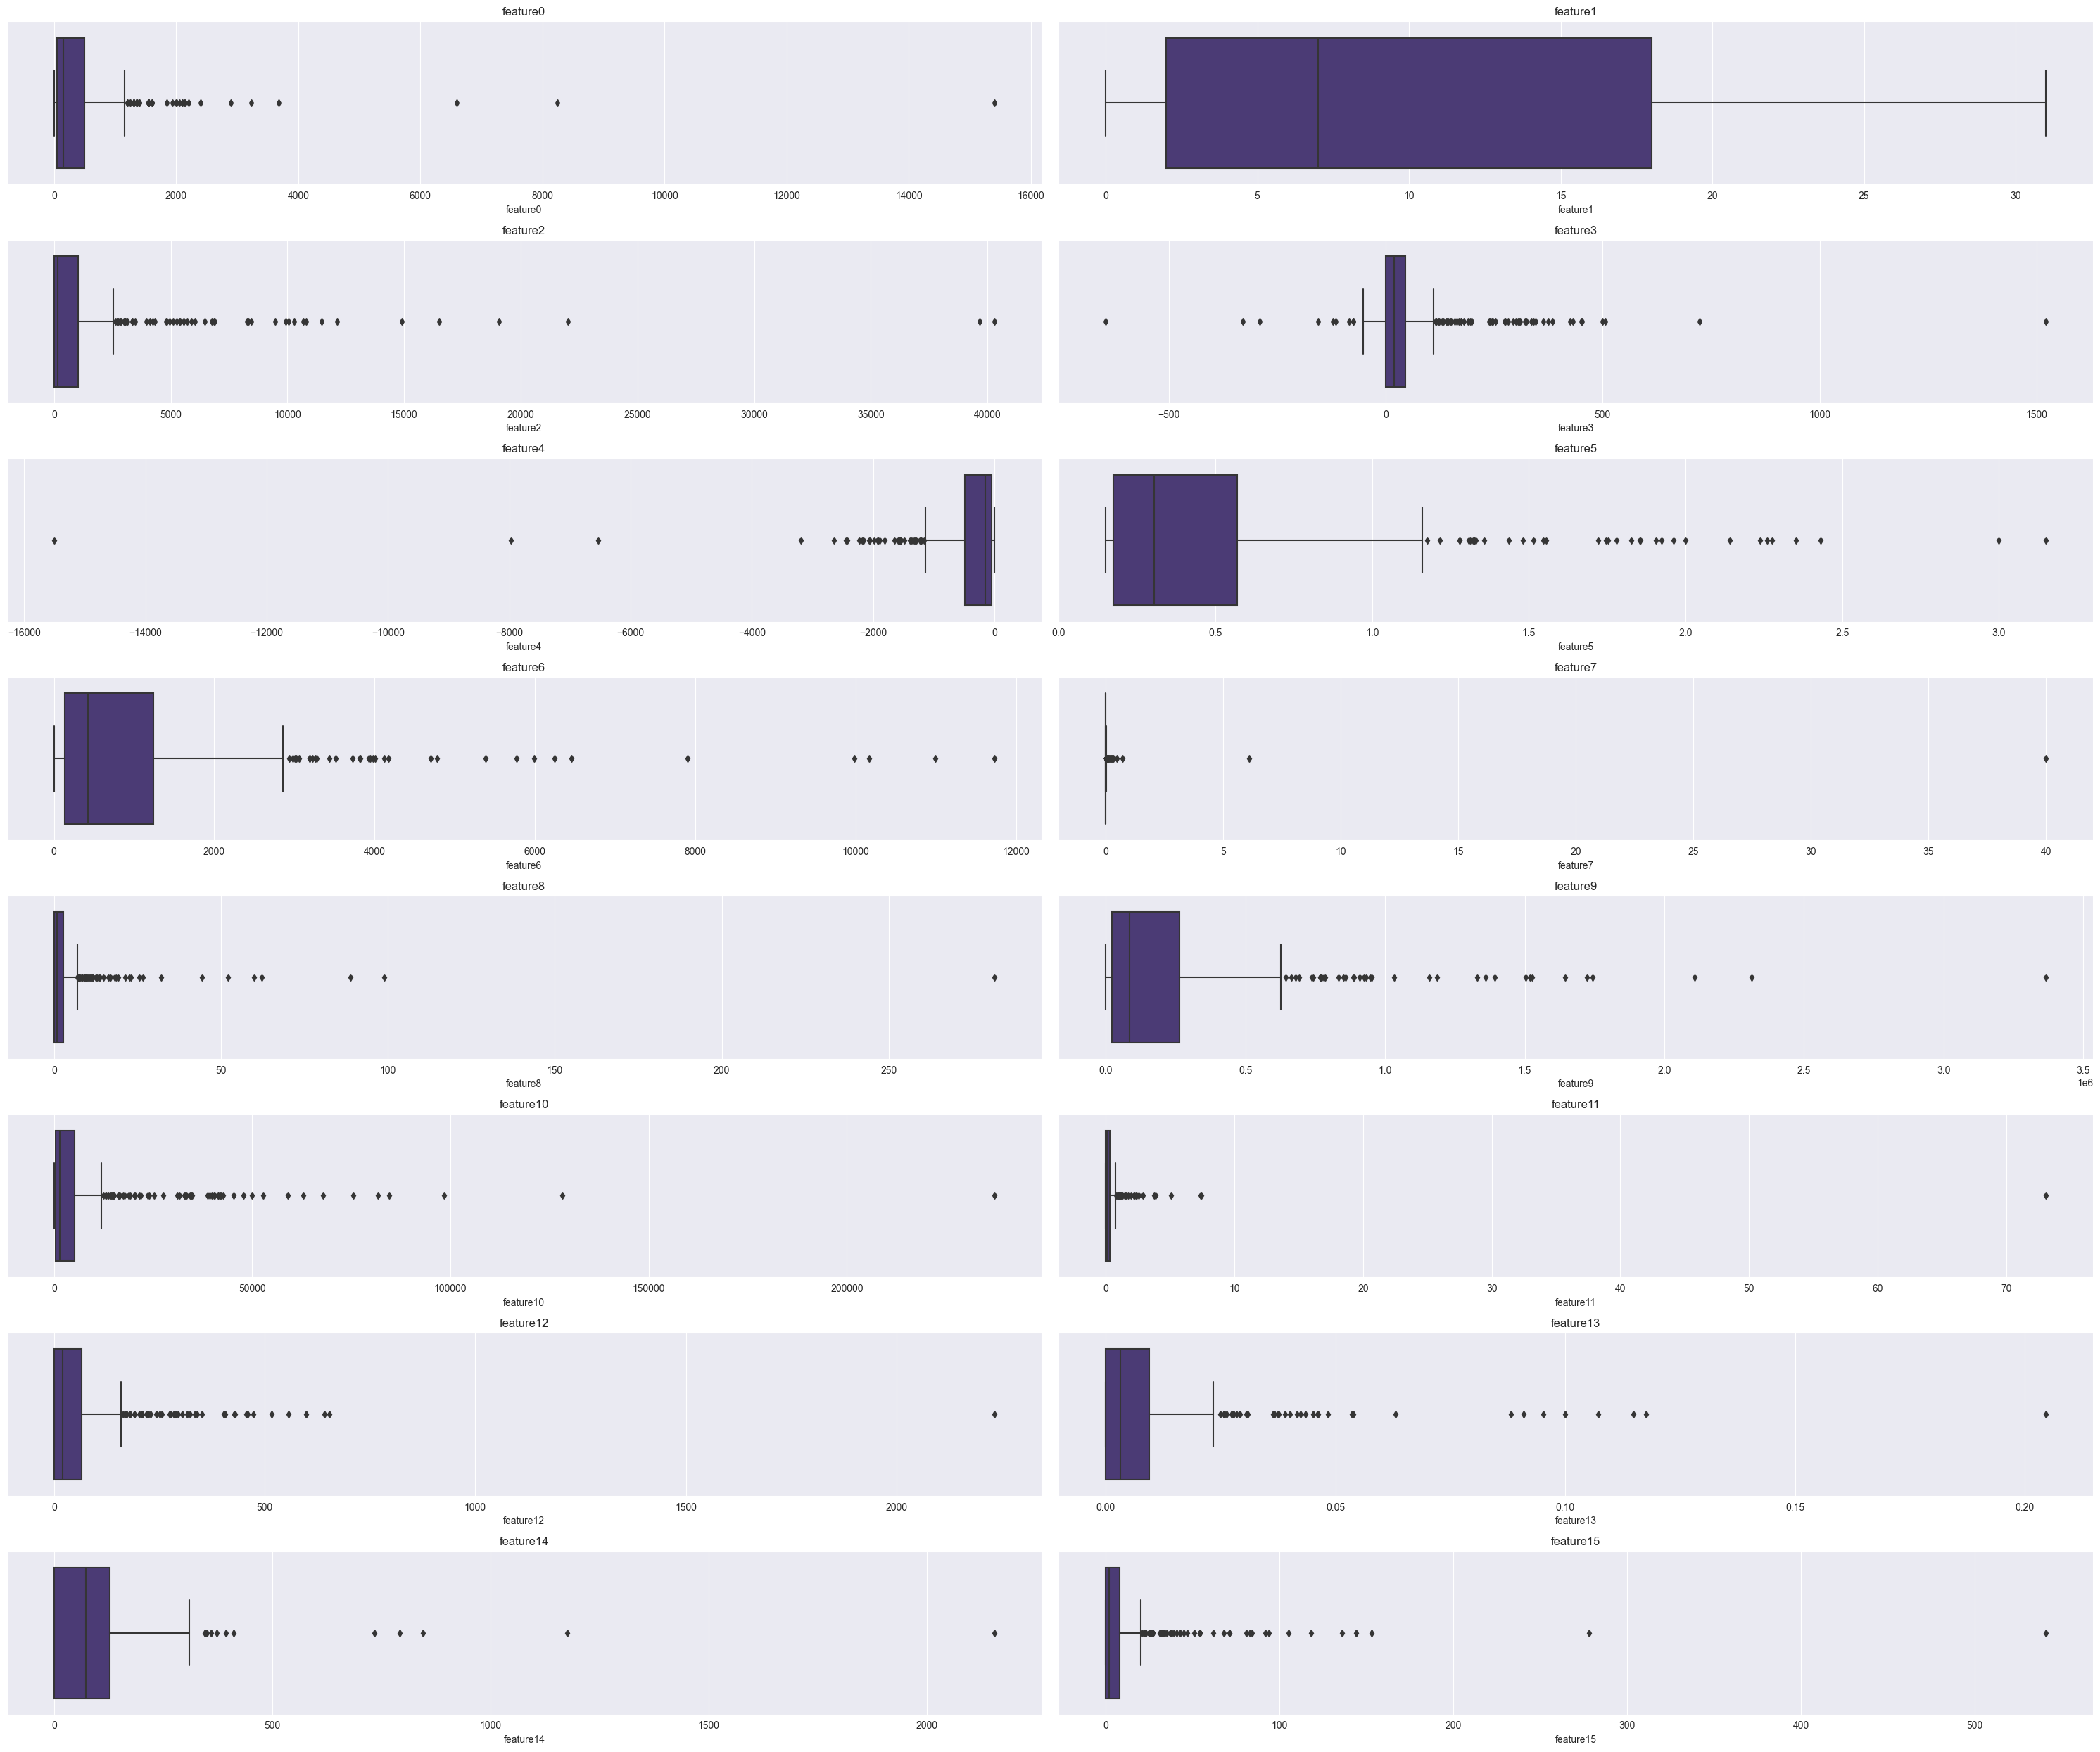

In [10]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (30, 25)

features = df.columns.drop(['target'])
n_features = len(features)

n_rows = math.ceil(n_features / 2)

fig, axes = plt.subplots(n_rows, 2)

for i, col in enumerate(features):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

for j in range(n_features, n_rows * 2):
    axes.flatten()[j].set_axis_off()

plt.tight_layout()
plt.show()

A partir dos boxplots das features podemos fazer as seguintes observações:

- Exceto pela feature1, que apresenta uma distribuição com a maioria dos valores acima da mediana mas sem outliers, todas as features parecem apresentar outliers (valores acima do bigode máximo e abaixo do bigode mínimo)

#### - Matriz de correlação

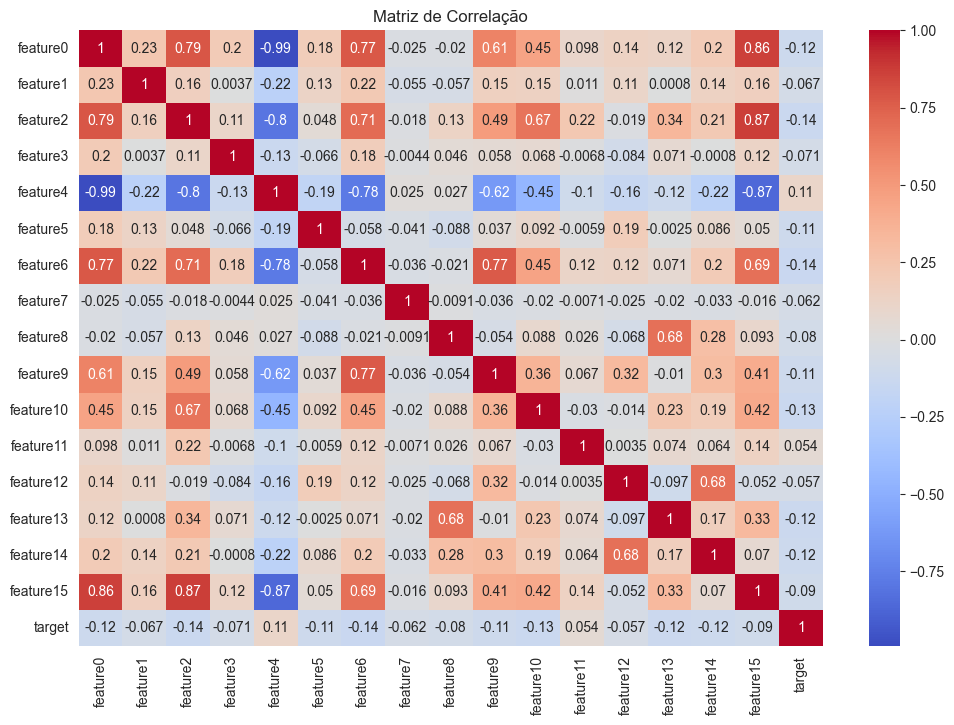

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

- feature0 e feature4 têm uma correlação negativa muito forte.
- feature15 e feature0 têm uma forte correlação positiva, indicada pelo vermelho escuro.
- feature15 e feature2 têm uma forte correlação positiva, indicada pelo vermelho escuro.
- Há várias features com pouca ou nenhuma correlação entre si, como feature3 com muitas outras features, indicadas pela cor branca ou azul claro.
- A linha e a coluna target indicam a correlação de cada feature com a variável alvo. Neste caso, não parece haver uma correlação forte entre a variável alvo e as demais features. **A falta de correlação alta não descarta features como úteis, pois pode haver relações não lineares ou interações com outras variáveis que não são capturadas por coeficientes de correlação.

#### **Aumento de dados** 

Antes de realizar as ações sugeridas para remover possíveis outliers, vamos realizar o aumento de dados, visto que a amostra é muito pequena (466 linhas) e a remoção de outliers vai, provavelmente diminuir significativamente a amostra. Sendo assim, a realização do aumento de dados antes da remoção de outliers pode afetar a percepção sobre quais dados são considerados outliers, ao introduzir variações adicionais que fazem com que alguns valores originalmente considerados outliers pareçam menos extremos em relação ao conjunto de dados expandido.

Obs: O aumento de dados deve ser feito com cuidado para não distorcer as características fundamentais dos dados.

In [12]:
import numpy as np
import pandas as pd

data_combinada = df.copy()

for i in range(3):
    # Gerando 'ruído' através do bootstrapping
    # Selecionamos valores aleatórios dos dados (com reposição)
    ruído_iteracao = df.drop(columns=['target']).sample(frac=1, replace=True).reset_index(drop=True)
    # Calculando a diferença em relação à média dos dados originais
    ruído_iteracao -= df.drop(columns=['target']).mean()
    # Adicionando ruído proporcional às características
    data_perturbada_iteracao = df.drop(columns=['target']) + ruído_iteracao
    data_perturbada_iteracao['target'] = df['target']
    data_combinada = pd.concat([data_combinada, data_perturbada_iteracao], ignore_index=True)

data_combinada

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.000000,2.000000,662.280000,39.10000,-188.550000,0.246978,761.000000,0.004548,3.523703,167326.000000,33441.060000,0.019804,26.850000,0.009198,94.611429,7.000000,0
1,150.000000,3.000000,0.000000,149.55000,-0.450000,0.150000,3.000000,0.037975,0.000000,79.000000,78.930000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,50.000000,23.000000,346.080000,30.41000,-102.100000,2.430952,42.000000,0.004239,3.389618,9907.000000,18858.770000,0.018351,25.525000,0.095238,86.520000,4.000000,0
3,100.000000,22.000000,0.000000,43.84000,-56.160000,0.150968,372.000000,0.005854,0.000000,63544.000000,1164.110000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,50.000000,18.000000,87.560000,-3.05000,-94.500000,0.412664,229.000000,0.004572,0.926561,50089.000000,1786.260000,0.049019,94.500000,0.004367,87.560000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,1011.256438,12.742489,10889.407532,193.09912,-835.050107,0.807571,1873.929185,-0.101491,7.760885,157386.175966,12625.723562,0.262288,-48.992363,0.022024,62.085776,70.686695,0
1860,-38.743562,11.742489,-1244.322468,-76.34088,31.159893,1.489564,-425.070815,-0.107026,-3.857010,-73943.824034,-4352.206438,-0.437333,-61.886190,-0.008634,-87.713360,-10.313305,1
1861,641.256438,14.742489,-144.252468,-36.67088,-677.860107,1.429807,189.929185,-0.107935,-1.348870,199926.175966,9309.433562,-0.229894,0.770953,0.003311,69.439497,-3.313305,0
1862,-288.743562,20.742489,-1244.322468,228.49912,259.999893,0.126009,-411.070815,-0.089715,-3.857010,-163318.824034,-2613.836438,-0.437333,-61.886190,-0.008634,-87.713360,-10.313305,0


In [13]:
print(f'Entradas no DataFrame antes da remoção de Outliers com Z-score: {df.shape[0]} linhas no total')
print(f'Variáveis no DataFrame antes da remoção de Outliers com Z-score: {df.shape[1]} colunas no total\n')

print(f'Entradas no DataFrame depois da remoção de Outliers com Z-score: {data_combinada.shape[0]} linhas no total')
print(f'Variáveis no DataFrame depois da remoção de Outliers com Z-score: {data_combinada.shape[1]} colunas no total')

Entradas no DataFrame antes da remoção de Outliers com Z-score: 466 linhas no total
Variáveis no DataFrame antes da remoção de Outliers com Z-score: 17 colunas no total

Entradas no DataFrame depois da remoção de Outliers com Z-score: 1864 linhas no total
Variáveis no DataFrame depois da remoção de Outliers com Z-score: 17 colunas no total


O método utilizado para o aumento de dados via adição de ruído foi o bootstrapping pois, ao contrário do método Gaussiano, não assume e nem depende de uma distribuição normal dos dados para funcionar corretamente. O bootstrapping é uma técnica de reamostragem usada para estimar estatísticas sobre uma população ao amostrar repetidamente com substituição do conjunto de dados existente. O objetivo é criar "novos" conjuntos de dados que imitem a distribuição do conjunto original. Ao aplicar o bootstrapping, esperamos que as propriedades estatísticas do conjunto de dados original sejam refletidas nas amostras reamostradas. 

Como indicado pelos prints acima, antes tínhamos uma amostra com 466 linhas e agora temos 1864 linhas. Vamos verificar se não destruímos as propriedades estatísticas dos dados visualizando novamente a análise estatística.

In [14]:
descriptive_stats = df.describe()
descriptive_stats

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,438.743562,10.257511,1244.322468,44.600880,-434.299893,0.473991,979.070815,0.113885,3.857010,2.164378e+05,6930.456438,0.437333,61.886190,0.008634,87.713360,10.313305,0.557940
std,984.593065,9.858908,3558.699033,122.093515,975.555198,0.452261,1460.738442,1.873746,15.609132,3.508622e+05,17581.800818,3.442094,142.521523,0.017866,145.426437,33.625204,0.497165
min,0.000000,0.000000,0.000000,-645.870000,-15506.350000,0.150000,1.000000,0.000663,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,2.000000,0.000000,-0.400000,-492.035000,0.173669,133.500000,0.003318,0.000000,2.113100e+04,383.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.000000,7.000000,169.830000,18.360000,-154.525000,0.303854,420.000000,0.005127,0.937082,8.532850e+04,1410.855000,0.082515,19.692568,0.003207,72.524286,2.000000,1.000000
75%,500.000000,18.000000,1017.375000,44.630000,-50.180000,0.569848,1238.750000,0.009699,2.815824,2.645035e+05,5212.977500,0.311311,65.498098,0.009515,127.301505,8.000000,1.000000
max,15400.000000,31.000000,40291.240000,1521.900000,-0.260000,3.150000,11731.000000,40.000000,281.666667,3.366472e+06,237182.780000,73.080634,2232.100000,0.204611,2154.000000,541.000000,1.000000


In [15]:
descriptive_stats = data_combinada.describe()
descriptive_stats

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1.864000e+03,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000
mean,409.714737,10.116416,1202.243235,40.977344,-408.865488,0.473140,966.890021,0.118814,3.616834,2.201249e+05,6329.044421,0.508710,60.836463,0.008329,83.349060,9.710837,0.557940
std,1145.838402,12.881496,4411.439736,153.912944,1138.018822,0.604442,1922.659112,2.476945,19.490308,4.821335e+05,21378.262866,5.111442,182.809008,0.023397,181.669380,39.657181,0.496765
min,-438.743562,-10.257511,-1244.322468,-690.770880,-15506.350000,-0.173991,-965.070815,-0.110809,-3.857010,-2.153208e+05,-6930.456438,-0.437333,-61.886190,-0.008634,-87.713360,-10.313305,0.000000
25%,-138.743562,0.000000,-968.452468,-23.490660,-614.625080,0.108047,-223.570815,-0.104741,-2.298788,-6.250432e+04,-4243.493938,-0.295781,-30.516716,-0.003634,0.000000,-7.313305,0.000000
50%,111.256438,8.000000,0.000000,3.199120,-104.170054,0.300000,359.964592,-0.096387,0.000000,6.891750e+04,274.215000,0.000000,6.726310,0.001515,62.268745,0.000000,1.000000
75%,600.000000,19.742489,1156.955000,48.299340,141.917393,0.649781,1549.929185,0.002908,2.831522,3.309140e+05,6052.107500,0.254586,74.765031,0.010990,134.558114,9.686695,1.000000
max,15400.000000,51.742489,45300.017532,1674.899120,432.099893,4.580377,20184.929185,40.000000,283.288711,3.983406e+06,263240.973562,73.080634,2262.213810,0.214423,2243.193307,541.000000,1.000000


Com base nas visualizações acima, as estatísticas descritivas parecem manter uma consistência geral. Podemos observar que os valores não se afastaram muito do conjunto original e, dessa forma, podemos dizer o bootstrapping não prejudicou a estrutura dos dados e o aumento de dados funcionou como esperado.

In [16]:
#data_combinada.to_csv("data_combinada.csv", index=False)

In [17]:
data_combinada = pd.read_csv("data_combinada.csv")

#### **Lidando com Outliers** 

Agora que já aumentamos nossa amostra vamos, como mencionado anteriormente, realizar uma comparação entre o método Z-score e o método IQR para realizar a remoção de outliers.

#### - Método Z-Score (Não indicado para o dataset devido a distribuição não normal dos dados):

1. Calcular a média (μ) e o desvio padrão (σ) de cada variável.
2. Calcular o Z-score para cada observação x na variável usando a fórmula: Z = (x - μ)/σ
3. Identificar outliers: Observações com um Z-score acima de um certo limiar (comum usar valores como 3 ou -3**) são consideradas outliers.

** 3 ou -3 representa menos de 0,3% do total dos dados, ou seja, dado que 99,7% dos dados em uma distribuição normal estão dentro de três desvios padrão da média, uma observação com um Z-score acima de 3 ou abaixo de -3 é muito incomum. 
Esses valores estão tão distantes da média padrão que são considerados estatisticamente significativos e, portanto, são identificados como outliers.

In [18]:
z_scores = (data_combinada - data_combinada.mean()) / data_combinada.std()
threshold = 3
outliers = (z_scores.abs() > threshold)

outliers_df = pd.DataFrame()

for feature in outliers.columns:
    if outliers[feature].any():
        outliers_df[feature] = data_combinada.loc[outliers[feature], feature]

if outliers_df.empty:
    print("Nenhum outlier encontrado!")
else:
    df_cleaned_zcore = data_combinada[~outliers.any(axis=1)]

print("DataFrame após a remoção de outliers com Z-Score:")
display(df_cleaned_zcore)

DataFrame após a remoção de outliers com Z-Score:


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.000000,2.000000,662.280000,39.10000,-188.550000,0.246978,761.000000,0.004548,3.523703,167326.000000,33441.060000,0.019804,26.850000,0.009198,94.611429,7.000000,0
1,150.000000,3.000000,0.000000,149.55000,-0.450000,0.150000,3.000000,0.037975,0.000000,79.000000,78.930000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,100.000000,22.000000,0.000000,43.84000,-56.160000,0.150968,372.000000,0.005854,0.000000,63544.000000,1164.110000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,50.000000,18.000000,87.560000,-3.05000,-94.500000,0.412664,229.000000,0.004572,0.926561,50089.000000,1786.260000,0.049019,94.500000,0.004367,87.560000,1.000000,0
5,850.000000,9.000000,1435.680000,1.60000,-848.400000,0.589167,1440.000000,0.003879,1.692221,371185.000000,2745.780000,0.522868,40.400000,0.014583,68.365714,21.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,1161.256438,15.742489,11165.277532,238.65912,-912.410107,0.143595,2794.929185,-0.102621,8.857261,471469.175966,12680.893562,0.383920,34.880970,0.024675,154.042443,73.686695,0
1860,-38.743562,-2.257511,-1153.962468,-36.99088,41.909893,0.536621,-341.070815,-0.082132,-1.620376,-83470.824034,-4371.646438,-0.131194,-21.486190,-0.000570,2.646640,-9.313305,1
1861,11.256438,-5.257511,-144.252468,-63.40088,-54.550107,0.424473,-58.070815,-0.106899,-1.348870,44105.175966,-1467.456438,-0.229894,0.770953,0.003311,69.439497,-3.313305,0
1862,-238.743562,21.742489,-1244.322468,116.34912,395.249893,0.002325,-841.070815,-0.105587,-3.857010,-181141.824034,-6595.866438,-0.437333,-61.886190,-0.008634,-87.713360,-10.313305,0


In [19]:
print(f'Entradas no DataFrame antes da remoção de Outliers com Z-score: {data_combinada.shape[0]} linhas no total')
print(f'Variáveis no DataFrame antes da remoção de Outliers com Z-score: {data_combinada.shape[1]} colunas no total\n')

print(f'Entradas no DataFrame depois da remoção de Outliers com Z-score: {df_cleaned_zcore.shape[0]} linhas no total')
print(f'Variáveis no DataFrame depois da remoção de Outliers com Z-score: {df_cleaned_zcore.shape[1]} colunas no total')

Entradas no DataFrame antes da remoção de Outliers com Z-score: 1864 linhas no total
Variáveis no DataFrame antes da remoção de Outliers com Z-score: 17 colunas no total

Entradas no DataFrame depois da remoção de Outliers com Z-score: 1621 linhas no total
Variáveis no DataFrame depois da remoção de Outliers com Z-score: 17 colunas no total


- Podemos observar que, utilizando o método Z-Score, 234 linhas foram eliminadas por conter pontos de dados considerados outliers.

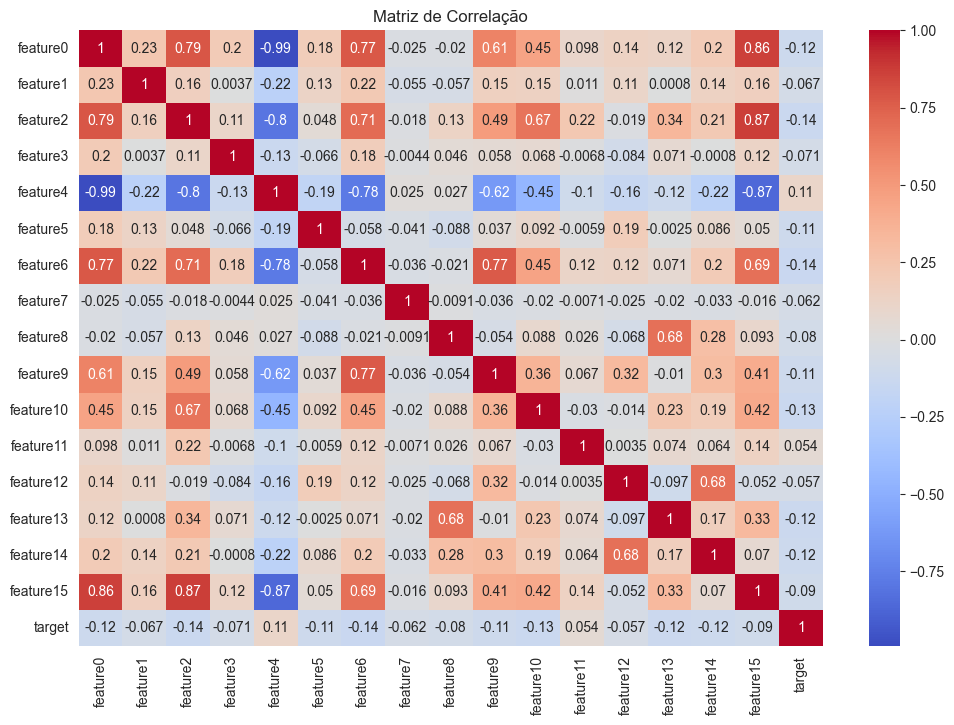

In [20]:
correlation_matrix_zscore = df_cleaned_zcore.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

Com a matriz de correlação após a remoção de outliers com Z-Score temos o seguinte ranking de correlações:

In [21]:
mask = np.triu(np.ones_like(correlation_matrix_zscore, dtype=bool), k=1)
correlation_matrix_masked = correlation_matrix_zscore.where(mask)
correlation_long = correlation_matrix_masked.unstack().dropna()
correlation_sorted = correlation_long.sort_values(ascending=False)
correlation_df = pd.DataFrame(correlation_sorted, columns=['Correlation'])
correlation_df

Correlation
feature15 feature2     0.904714
feature13 feature8     0.846206
feature9  feature6     0.790818
          feature0     0.776931
feature6  feature0     0.751742
...                         ...
feature15 feature4    -0.603667
feature4  feature2    -0.619806
feature6  feature4    -0.776797
feature9  feature4    -0.806494
feature4  feature0    -0.970230

[136 rows x 1 columns]

#### - Método Interquartile Range (IQR):
O IQR mede a dispersão estatística, ou seja, o grau pelo qual os valores de um conjunto de dados estão espalhados. 

Ele é calculado como a diferença entre o 75º percentil (Q3) e o 25º percentil (Q1). Esses percentis dividem os dados em quatro partes iguais, com o IQR representando o intervalo da metade intermediária dos dados. Abaixo temos uma explicação mais detalhada:

1. **Cálculo dos Quartis:** Inicialmente, calculam-se os quartis da distribuição dos dados. O primeiro quartil (Q1) representa o valor abaixo do qual 25% das observações caem, e o terceiro quartil (Q3) representa o valor abaixo do qual 75% das observações caem.

2. **Cálculo do IQR:** O IQR é a diferença entre o terceiro e o primeiro quartil (Q3 - Q1). Este valor representa a variação média dos 50% centrais dos dados. 

3. **Identificação de Outliers:** Outliers são definidos como observações que estão significativamente acima ou abaixo da maioria dos dados. No método IQR, qualquer valor que esteja a mais de 1.5 (definido manualmente, vide observação) vezes o IQR abaixo de Q1 ou acima de Q3 é considerado um outlier.

Obs: A regra de multiplicação do IQR por 1.5 para identificar outliers é uma convenção, mas ela pode ser ajustada conforme necessário, tornando a identificação de outliers mais ou menos rigorosa.

In [22]:
Q1 = data_combinada.quantile(0.25)
Q3 = data_combinada.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = data_combinada[~((data_combinada < (Q1 - 1.5 * IQR)) | (data_combinada > (Q3 + 1.5 * IQR))).any(axis=1)]

print("DataFrame após a remoção de outliers:")
display(df_cleaned)

DataFrame após a remoção de outliers:


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
1,150.000000,3.000000,0.000000,149.55000,-0.450000,0.150000,3.000000,0.037975,0.000000,79.000000,78.930000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,100.000000,22.000000,0.000000,43.84000,-56.160000,0.150968,372.000000,0.005854,0.000000,63544.000000,1164.110000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,50.000000,18.000000,87.560000,-3.05000,-94.500000,0.412664,229.000000,0.004572,0.926561,50089.000000,1786.260000,0.049019,94.500000,0.004367,87.560000,1.000000,0
5,850.000000,9.000000,1435.680000,1.60000,-848.400000,0.589167,1440.000000,0.003879,1.692221,371185.000000,2745.780000,0.522868,40.400000,0.014583,68.365714,21.000000,1
6,50.000000,1.000000,436.850000,6.80000,-82.150000,0.238116,345.000000,0.018375,5.317712,18776.000000,959.570000,0.455256,20.537500,0.011594,109.212500,4.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,-438.743562,-3.257511,-1244.322468,-20.50088,313.749893,0.334420,-538.070815,-0.100791,-3.857010,-127358.824034,-6740.476438,-0.437333,-61.886190,-0.008634,-87.713360,-10.313305,1
1858,611.256438,-1.257511,711.507532,19.39912,-798.300107,0.326009,995.929185,-0.094035,-2.200650,39141.175966,-3435.596438,0.211795,11.913810,-0.000504,34.526015,5.686695,1
1860,-38.743562,-2.257511,-1153.962468,-36.99088,41.909893,0.536621,-341.070815,-0.082132,-1.620376,-83470.824034,-4371.646438,-0.131194,-21.486190,-0.000570,2.646640,-9.313305,1
1861,11.256438,-5.257511,-144.252468,-63.40088,-54.550107,0.424473,-58.070815,-0.106899,-1.348870,44105.175966,-1467.456438,-0.229894,0.770953,0.003311,69.439497,-3.313305,0


In [23]:
print(f'Entradas no DataFrame antes da remoção de Outliers com Z-score: {data_combinada.shape[0]} linhas no total')
print(f'Variáveis no DataFrame antes da remoção de Outliers com Z-score: {data_combinada.shape[1]} colunas no total\n')

print(f'Entradas no DataFrame depois da remoção de Outliers com Z-score: {df_cleaned.shape[0]} linhas no total')
print(f'Variáveis no DataFrame depois da remoção de Outliers com Z-score: {df_cleaned.shape[1]} colunas no total')

Entradas no DataFrame antes da remoção de Outliers com Z-score: 1864 linhas no total
Variáveis no DataFrame antes da remoção de Outliers com Z-score: 17 colunas no total

Entradas no DataFrame depois da remoção de Outliers com Z-score: 875 linhas no total
Variáveis no DataFrame depois da remoção de Outliers com Z-score: 17 colunas no total


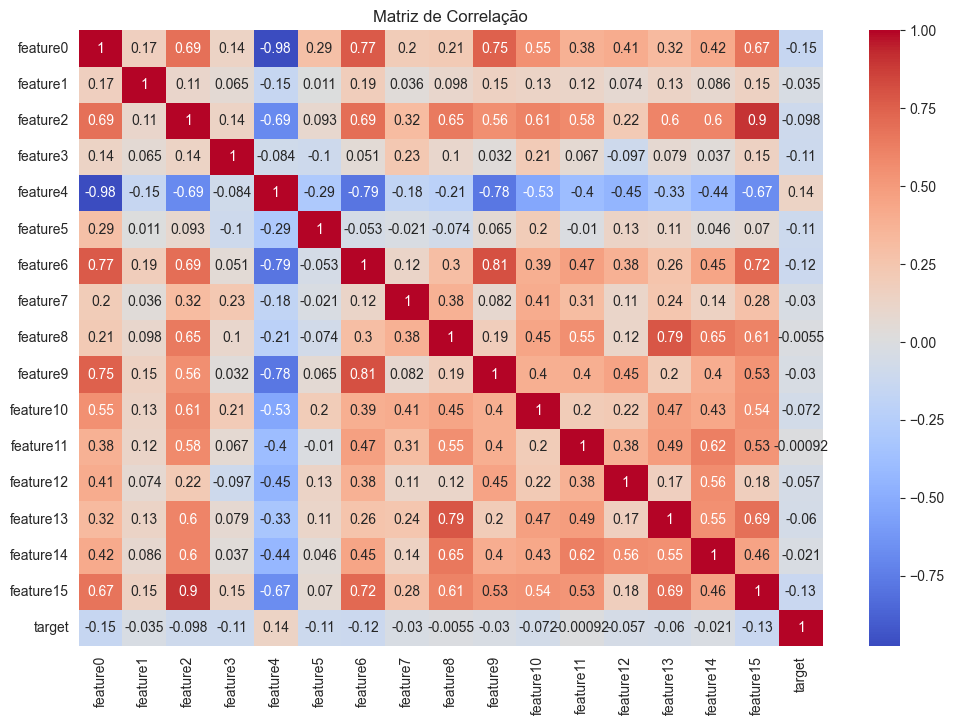

In [24]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

Com a matriz de correlação após a remoção de outliers com IQR temos o seguinte ranking de correlações:

In [25]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
correlation_matrix_masked = correlation_matrix.where(mask)
correlation_long = correlation_matrix_masked.unstack().dropna()
correlation_sorted = correlation_long.sort_values(ascending=False)
correlation_df = pd.DataFrame(correlation_sorted, columns=['Correlation'])
correlation_df

,,Correlation
feature15,feature2,0.901724
feature9,feature6,0.813462
feature13,feature8,0.785231
feature6,feature0,0.770101
feature9,feature0,0.751200
...,...,...
feature15,feature4,-0.673529
feature4,feature2,-0.688703
feature9,feature4,-0.782385
feature6,feature4,-0.790685


- Podemos observar que, utilizando o método IQR a correlação entre as features diminuiu ligeiramente e foram eliminadas MUITAS linhas, principalmente olhando em relação ao método Z-Score, isso pode ser bastante tentador e nos levar a utilizar o Z-Score, mas é preciso lembrar que o método IQR é mais apropriado do que métodos baseados em suposições de normalidade, como o Z-score. Mas por que?

O método IQR depende apenas dos quartis, que são medidas de tendência central e dispersão que não pressupõem nenhuma distribuição específica. Isso faz com que o IQR seja particularmente útil para dados com distribuições assimétricas.

Além disso, o IQR é uma medida robusta, o que significa que é menos influenciado por outliers extremos. Isso é importante especialmente em distribuições não normais, onde a presença de outliers extremos pode distorcer significativamente a média e o desvio padrão, levando a conclusões enganosas se métodos baseados nessas medidas forem utilizados.

#### **Análise estatística para verificar melhoria** 

In [26]:
descriptive_stats = df_cleaned.describe()
descriptive_stats

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,70.408605,9.677533,-230.457896,12.223798,-81.309901,0.341351,355.376493,-0.058180,-0.407680,72694.176334,-860.190422,-0.044839,15.105289,0.000939,28.508196,-1.121040,0.594286
std,369.106573,12.879421,963.178194,46.117702,375.820112,0.379667,915.266773,0.056649,3.031325,207877.741219,4669.219620,0.329291,66.362858,0.007992,84.789633,8.753241,0.491311
min,-438.743562,-10.257511,-1244.322468,-96.530880,-1663.610107,-0.173991,-949.070815,-0.110613,-3.857010,-215019.824034,-6930.456438,-0.437333,-61.886190,-0.008634,-87.713360,-10.313305,0.000000
25%,-238.743562,0.000000,-1096.482468,-17.575880,-219.485054,0.088340,-330.570815,-0.103780,-2.870237,-83310.324034,-5039.116438,-0.344205,-35.501190,-0.005532,-23.235796,-8.313305,0.000000
50%,50.000000,7.742489,-133.572468,1.699120,-45.000000,0.263208,163.000000,-0.093318,-0.169899,31040.000000,-729.306438,0.000000,0.000000,0.000000,1.265102,-1.313305,1.000000
75%,200.000000,18.742489,162.095000,36.849560,199.389893,0.523351,792.964592,0.003682,1.017665,170537.175966,1566.216781,0.106344,47.844905,0.004986,80.931015,2.000000,1.000000
max,1561.256438,49.742489,4157.957532,173.269120,429.499893,1.479342,4147.929185,0.155005,10.392661,888315.000000,21556.490000,1.007136,234.963810,0.030912,306.886640,33.000000,1.000000


- Os valores agora parecem ter uma distribuição melhor, como é o caso da feature12 (feature que apontamos anteriormente com possível presença de outliers) que tinha como valor mínimo -61.886190 e máximo 2505.013810. Agora o valor máximo para essa feature é de 241.913810, uma diferença significativa.
- No geral, as diversas features alteradas demonstram melhoria na sua distribuição

#### **Analisando a variável target** 

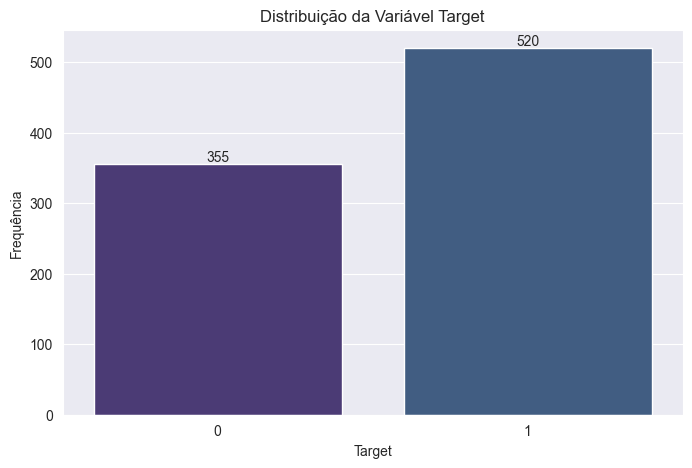

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

target_distribution = df_cleaned['target'].value_counts()

plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target')
plt.xlabel('Target')
plt.ylabel('Frequência')

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             int(bar.get_height()), 
             ha='center', va='bottom')

plt.show()

A partir do gráfico de barras, podemos analisar a distribuição da variável target, que representa duas categorias: 0 e 1. Esta variável é binária e indica se um evento ocorreu (1) ou não (0), como já citado anteriormente. Observamos que a categoria 1 ocorre com uma frequência significativamente maior do que a categoria 0. Isso pode levar a um viés em modelos de aprendizado de máquina, onde o modelo pode ter uma tendência a prever predominantemente a classe mais frequente, portanto é um ponto de atenção ao realizar o treinamento.

#### **Sobreamostragem (Oversampling) com SMOTE** 

Para resolver o problema citado acima, onde uma classe tem mais amostras que outras, vamos utilizar o método de Oversampling, que consiste em aumentar o número de instâncias da classe minoritária para corresponder à classe majoritária. Isso pode ser feito gerando novos exemplos sintéticos (como SMOTE - Synthetic Minority Over-sampling Technique), por exemplo.

In [28]:
from imblearn.over_sampling import SMOTE

X = df_cleaned.drop('target', axis=1)  # features
y = df_cleaned['target']                # target

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_features_resampled = pd.DataFrame(X_resampled, columns=df_cleaned.drop('target', axis=1).columns)
df_target_resampled = pd.DataFrame(y_resampled, columns=['target'])

df_smote = pd.concat([df_features_resampled, df_target_resampled], axis=1)
df_smote

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,150.000000,3.000000,0.000000,149.550000,-0.450000,0.150000,3.000000,0.037975,0.000000,79.000000,78.930000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,100.000000,22.000000,0.000000,43.840000,-56.160000,0.150968,372.000000,0.005854,0.000000,63544.000000,1164.110000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,50.000000,18.000000,87.560000,-3.050000,-94.500000,0.412664,229.000000,0.004572,0.926561,50089.000000,1786.260000,0.049019,94.500000,0.004367,87.560000,1.000000,0
3,850.000000,9.000000,1435.680000,1.600000,-848.400000,0.589167,1440.000000,0.003879,1.692221,371185.000000,2745.780000,0.522868,40.400000,0.014583,68.365714,21.000000,1
4,50.000000,1.000000,436.850000,6.800000,-82.150000,0.238116,345.000000,0.018375,5.317712,18776.000000,959.570000,0.455256,20.537500,0.011594,109.212500,4.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,35.832526,14.183142,-983.290202,-20.988043,-9.988125,0.786309,-414.849949,-0.077218,-2.425439,-105154.907592,-5147.683931,-0.282743,129.813023,-0.002323,-36.794346,-6.448885,0
1036,709.547829,16.193045,315.495002,34.064397,-659.303483,0.176925,2020.533649,-0.039476,-0.757683,316589.203069,3418.173955,-0.062016,108.693112,-0.000818,86.628119,3.633939,0
1037,57.103192,20.047404,196.130019,6.417006,-86.362257,0.388511,199.661260,0.007815,2.777706,12048.529017,414.465407,0.380646,32.813832,0.011997,97.016661,2.809985,0
1038,1021.430144,21.359115,830.178840,57.257471,-946.557211,0.212056,2009.336126,-0.099227,-1.285432,313246.587949,3758.502440,-0.151759,32.037249,-0.000185,69.514108,7.814487,0


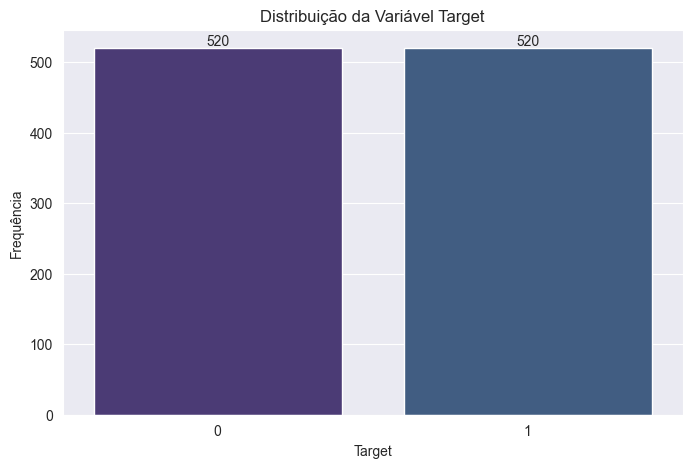

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

target_distribution = df_smote['target'].value_counts()

plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target')
plt.xlabel('Target')
plt.ylabel('Frequência')

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             int(bar.get_height()), 
             ha='center', va='bottom')

plt.show()

Após a aplicação da técnica de SMOTE, podemos observar que a distribuição da variável target mudou, agora temos o mesmo número de amostras para ambas as classes. Essa técnica resolve o problema citado anteriormente pois tranforma o nosso dataframe em um dataframe balanceado, evitando que o modelo tenha tendência a prever mais uma classe do que outra.

#### **Modelagem** 

Agora que já fizemos tratamentos e mudanças significativas em nossos dados de amostra, vamos partir para aplicação de técnicas de modelagem, focaremos em 4 pontos:

- Seleção de features importantes por meio de Random Forest;
- Seleção de hiperparâmetros por meio de Grid Search;
- Comparação do algoritmo SVM com uma rede neural MLP;
- Comparação entre o treinamento com o dataframe usando SMOTE e o dataframe desbalanceado (se traz diferenças, considerando que já utilizaremos Validação Cruzada Estratificada em ambos os casos.

Obs: **Validação Cruzada Estratificada** é uma técnica de validação semelhante a Validação Cruzada comum mas é particularmente útil quando se está trabalhando com conjuntos de dados em que as classes são muito mais frequentes do que outras (desbalanceado). Não há problema em usar a validação cruzada estratificada em um conjunto de dados balanceado, mas a principal vantagem dessa técnica é mais evidente em conjuntos de dados desbalanceados. Em um conjunto de dados balanceado a validação cruzada estratificada e a validação cruzada simples tendem a fornecer resultados semelhantes.

#### - **Seleção de features importantes por meio de Random Forest**

A seleção de features importantes por meio do algoritmo Random Forest é uma técnica para identificar e priorizar as características mais significativas em um conjunto de dados. O Random Forest é baseado em árvores de decisão, cria várias árvores de decisão durante o treinamento e combina suas previsões para melhorar a precisão e controlar o overfitting.

Acurácia média com Validação Cruzada Estratificada: 0.7010
Desvio padrão das acurácias com Validação Cruzada Estratificada: 0.0379


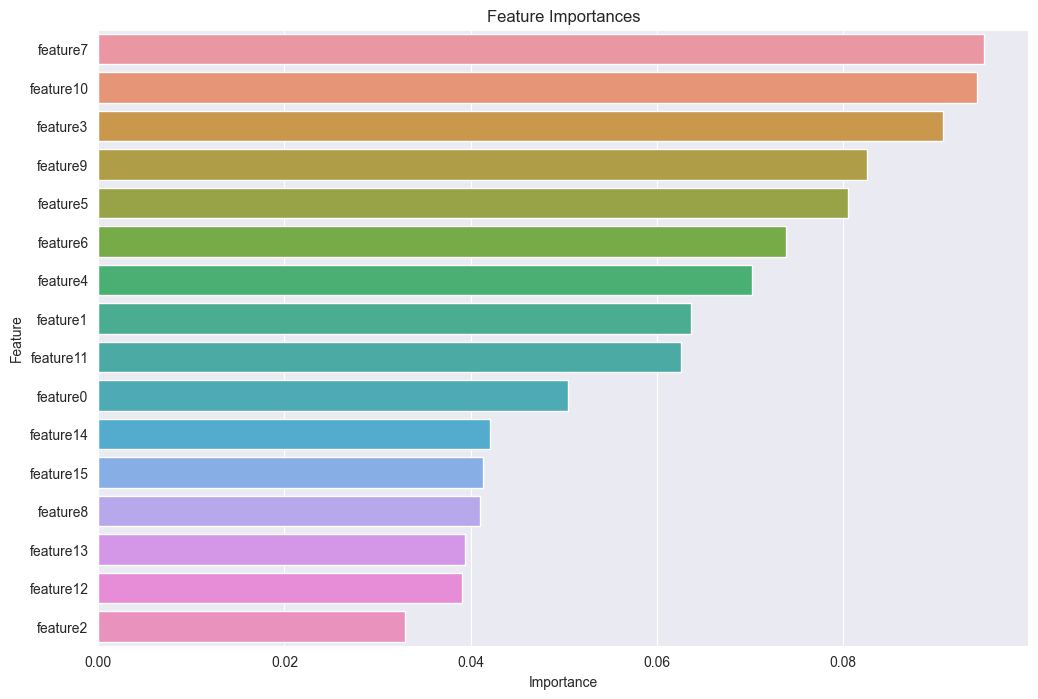

In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X = df_smote.drop('target', axis=1)
y = df_smote['target']

rf = RandomForestClassifier(n_estimators=59, random_state=42)

k = 5

strat_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

stratified_cv_scores = cross_val_score(rf, X, y, cv=strat_kfold, scoring='accuracy')

stratified_cv_accuracy = np.mean(stratified_cv_scores)
stratified_cv_std = np.std(stratified_cv_scores)

print(f"Acurácia média com Validação Cruzada Estratificada: {stratified_cv_accuracy:.4f}")
print(f"Desvio padrão das acurácias com Validação Cruzada Estratificada: {stratified_cv_std:.4f}")

rf.fit(X, y)

feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

O Random Forest foi executado com sucesso e nos trouxe a importância de cada feature, que foram plotadas por ordem no gráfico de barras. A acurácia do processo foi de 0.7010, o que é um resultado moderado. n_estimators foi definido como 59 pois observou-se que abaixo ou acima disso a acurácia era menor, apesar de que a importância das features não se alterava significativamente. Utilizando como base esse resultado, filtraremos o dataset para utilizar as 3 principais features: 3, 7 e 10.

In [31]:
df_filtrado = df_smote[['feature3', 'feature7', 'feature10', 'target']]

#### - **Comparação do algoritmo SVM com uma rede neural MLP**

Vamos modelar o algoritmo SVM (Support Vector Machine) e uma rede neural MLP, em seguida vamos comparar os resultados obtidos.

Mas antes vamos entender sobre as métricas que observaremos:

- **Average Accuracy (Acurácia Média):** A acurácia média é a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. É uma medida geral do desempenho do modelo, indicando com que frequência ele acerta. Porém, pode ser enganosa em conjuntos de dados desbalanceados, onde uma classe é muito mais frequente que as outras.

- **Average Precision (Precisão Média):** A precisão média é a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo. Indica a qualidade das previsões positivas do modelo. É especialmente importante em situações onde os falsos positivos são custosos ou indesejáveis. Entretanto, não leva em conta os verdadeiros negativos, podendo ser enganosa se a classe positiva for rara.

- **Average Recall (Sensibilidade Média):** O Recall médio é a proporção de verdadeiros positivos em relação ao total de casos que são realmente positivos (verdadeiros positivos mais falsos negativos). Mostra a capacidade do modelo de encontrar todas as instâncias positivas. É crucial em situações onde perder um positivo real é crítico (Por exemplo, no diagnóstico de doenças, como citado nas aulas da disciplina).

- **Average F1 Score (Pontuação F1 Média):** O F1 Score é a média harmônica entre precisão e recall. F1 Score balanceia precisão e recall, sendo útil quando se quer um equilíbrio entre detectar o máximo de positivos reais e minimizar os falsos positivos. Uma limitação é que pode não ser informativo em contextos muito desbalanceados, pois assume que precisão e recall são igualmente importantes.

- **Average ROC AUC Score (Área sob a Curva ROC - AUC):** AUC é a área sob a curva ROC (Receiver Operating Characteristic), que é um gráfico do verdadeiro positivo contra o falso positivo em diferentes limiares de classificação. Fornece uma medida agregada do desempenho em todos os limiares de classificação possíveis. É útil para avaliar o desempenho geral do modelo, especialmente em dados desbalanceados. Porém, pode ser difícil de interpretar em casos específicos e não reflete diretamente a acurácia do modelo.

#### - SVM (Support Vector Machine):

O SVM (Support Vector Machine) é um modelo de aprendizado supervisionado muito utilizado em problemas de classificação e regressão. Originalmente, o SVM foi desenvolvido para classificação binária, ou seja, separar dados em duas classes (como é o caso do nosso dataset). Em casos onde os dados não são linearmente separáveis, o SVM usa uma técnica conhecida como "kernel trick". Essa técnica transforma os dados em um espaço de maior dimensão onde eles podem ser separados linearmente. Exemplos de kernels incluem polinomial, RBF (Radial Basis Function) e sigmóide.

Discorrendo brevemente sobre os hiperparâmetros principais:

- **C:** O parâmetro C é um termo de regularização que controla o trade-off entre alcançar uma margem de classificação grande (maximizando a distância entre as linhas de decisão e os pontos mais próximos de cada classe, conhecidos como vetores de suporte) e minimizar o erro de classificação. Em termos simples, quanto maior o valor de C, mais o modelo penaliza os erros de classificação.

    - Impacto: Um valor baixo de C (como 0.3) torna a fronteira de decisão mais suave e pode levar a uma maior margem, mas com mais violações da margem (ou seja, mais erros de classificação são permitidos). Isso é útil para conjuntos de dados com muito ruído, onde é preferível aceitar mais erros para obter uma generalização melhor.

- **gamma:** O parâmetro gamma define a influência de um único exemplo de treinamento. Ele está relacionado à "propagação" do RBF. Um valor baixo significa uma propagação 'larga', e um valor alto resulta em uma propagação 'estreita'.
    - Impacto: Um valor pequeno de gamma (como 0.0001) implica que cada ponto de dados tem uma influência de longo alcance. Isso pode levar a uma fronteira de decisão mais suave. Por outro lado, um valor alto de gamma tende a criar fronteiras de decisão complexas e pode levar a sobreajuste, pois o modelo tenta capturar perfeitamente todos os pontos de treinamento.
- **kernel:**
    - Função: O kernel define o tipo de função usada para transformar o espaço de entrada em um espaço dimensional superior onde é mais fácil separar as classes linearmente. O kernel RBF é uma escolha popular porque pode lidar com casos em que a relação entre os atributos de classe não é linear.
Impacto: O kernel RBF pode mapear entradas em um espaço de características de dimensão infinita, permitindo lidar com casos complexos e não lineares.

- Vamos usar Grid Search para tentar obter uma boa combinação de hiperparâmetros para o SVM:

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definindo o modelo
svm_model = SVC(kernel='rbf')

# Definindo a grade de hiperparâmetros
param_grid = {
    'C': [0.001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000],
    'gamma': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
}

# Busca em grade com validação cruzada
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X, y)

# Melhores parâmetros
best_params_svm = grid_search.best_params_
print(best_params_svm)

{'C': 0.001, 'gamma': 0.0001}


- Utilizando o reaultado do Grid Search:

In [34]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X = df_filtrado.drop('target', axis=1)
y = df_filtrado['target']

svm_model = SVC(C=0.001, gamma=0.0001, kernel='rbf', probability=True)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='accuracy')
precision_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='precision_macro')
recall_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='recall_macro')
f1_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='f1_macro')

roc_auc_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='roc_auc')

print(f"Average Accuracy: {accuracy_scores.mean()}")
print(f"Average Precision: {precision_scores.mean()}")
print(f"Average Recall: {recall_scores.mean()}")
print(f"Average F1 Score: {f1_scores.mean()}")
print(f"Average ROC AUC Score: {roc_auc_scores.mean()}")

Average Accuracy: 0.5538461538461539
Average Precision: 0.5822536940959335
Average Recall: 0.5538461538461539
Average F1 Score: 0.510553036623796
Average ROC AUC Score: 0.5885355029585798


- Melhor combinação encontrada manualmente:

In [35]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X = df_filtrado.drop('target', axis=1)
y = df_filtrado['target']

svm_model = SVC(C=0.3, gamma=0.0001, kernel='rbf', probability=True)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='accuracy')
precision_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='precision_macro')
recall_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='recall_macro')
f1_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='f1_macro')

roc_auc_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='roc_auc')

print(f"Average Accuracy: {accuracy_scores.mean()}")
print(f"Average Precision: {precision_scores.mean()}")
print(f"Average Recall: {recall_scores.mean()}")
print(f"Average F1 Score: {f1_scores.mean()}")
print(f"Average ROC AUC Score: {roc_auc_scores.mean()}")

Average Accuracy: 0.5653846153846154
Average Precision: 0.570549297665868
Average Recall: 0.5653846153846154
Average F1 Score: 0.557399829020459
Average ROC AUC Score: 0.5899038461538461


Embora o modelo SVM tenha demonstrado alguma capacidade de prever as classes corretamente, as métricas indicam um desempenho moderado (dependendo da complexidade do problema). A acurácia, precisão e recall estão todos na faixa de 55%, enquanto a pontuação F1 e a pontuação ROC AUC estão um pouco mais altas, mas ainda abaixo de 60%. Ajustar as medidas manualmente ou utilizando Grid Search não melhorou o desempenho do modelo, o que indica que possivelmente o algoritmo SVM não é o mais indicado para lidar com nosso conjunto de dados.

#### - MLP:

Daqui pra baixo vou ter q arrumar outra parte

In [36]:
df_filtrado = df_smote[['feature3', 'feature7', 'feature10', 'target']]
df_filtrado1 = df_cleaned[['feature3', 'feature7', 'feature10', 'target']]

In [37]:
# Com df_smote (balanceado)
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Suponha que df_filtrado é o seu DataFrame
# Divisão em features e target
X = df_filtrado.drop('target', axis=1)
y = df_filtrado['target']

# Escalando os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Configuração de validação cruzada
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

acc_scores, prec_scores, rec_scores, f1_scores, auc_roc_scores, iterations = [], [], [], [], [], []

for train_index, val_index in skf.split(X_scaled, y):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', 
                        alpha=0.6, solver='lbfgs', max_iter=2330, 
                        random_state=42, early_stopping=True, validation_fraction=0.1, learning_rate= 'adaptive')
    mlp.fit(X_train, y_train)

    iterations.append(mlp.n_iter_)

    y_pred = mlp.predict(X_val)
    acc_scores.append(accuracy_score(y_val, y_pred))
    prec_scores.append(precision_score(y_val, y_pred))
    rec_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))
    auc_roc_scores.append(roc_auc_score(y_val, y_pred))

# Calculando médias
avg_accuracy = np.mean(acc_scores)
avg_precision = np.mean(prec_scores)
avg_recall = np.mean(rec_scores)
avg_f1_score = np.mean(f1_scores)
avg_auc_roc_score = np.mean(auc_roc_scores)

# Imprimindo resultados
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1_score}")
print(f"Average AUC-ROC Score: {avg_auc_roc_score}")
print(f"Average number of iterations: {np.mean(iterations)}")
print("Iterations per fold:", iterations)

Average Accuracy: 0.6144386862445463
Average Precision: 0.6050940585063777
Average Recall: 0.6693620244141495
Average F1 Score: 0.6342410613742082
Average AUC-ROC Score: 0.6145527042680211
Average number of iterations: 1326.8333333333333
Iterations per fold: [2329, 1261, 1482, 958, 1216, 715]


In [38]:
# Com df_cleaned (nao balanceado)
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Suponha que df_filtrado é o seu DataFrame
# Divisão em features e target
X = df_filtrado1.drop('target', axis=1)
y = df_filtrado1['target']

# Escalando os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Configuração de validação cruzada
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

acc_scores, prec_scores, rec_scores, f1_scores, auc_roc_scores, iterations = [], [], [], [], [], []

for train_index, val_index in skf.split(X_scaled, y):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', 
                        alpha=0.6, solver='lbfgs', max_iter=2330, 
                        random_state=42, early_stopping=True, validation_fraction=0.1, learning_rate= 'adaptive')
    mlp.fit(X_train, y_train)

    iterations.append(mlp.n_iter_)

    y_pred = mlp.predict(X_val)
    acc_scores.append(accuracy_score(y_val, y_pred))
    prec_scores.append(precision_score(y_val, y_pred))
    rec_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))
    auc_roc_scores.append(roc_auc_score(y_val, y_pred))

# Calculando médias
avg_accuracy = np.mean(acc_scores)
avg_precision = np.mean(prec_scores)
avg_recall = np.mean(rec_scores)
avg_f1_score = np.mean(f1_scores)
avg_auc_roc_score = np.mean(auc_roc_scores)

# Imprimindo resultados
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1_score}")
print(f"Average AUC-ROC Score: {avg_auc_roc_score}")
print(f"Average number of iterations: {np.mean(iterations)}")
print("Iterations per fold:", iterations)

Average Accuracy: 0.621768225476303
Average Precision: 0.6236943877881378
Average Recall: 0.9135257952419139
Average F1 Score: 0.741115290440924
Average AUC-ROC Score: 0.553961579353537
Average number of iterations: 505.8333333333333
Iterations per fold: [588, 290, 343, 631, 629, 554]


In [39]:
# Busca grid search adicionar aq
# {'activation': 'tanh', 'alpha': 3, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}

In [40]:
"""from sklearn.model_selection import GridSearchCV

# Definindo o espaço de parâmetros para a busca
param_grid = {
    'hidden_layer_sizes': [(50,50), (100,50)],
    'activation': ['relu'],
    'solver': ['lbfgs'],
    'alpha': [0.0001, 0.2, 0.01, 0.05, 0.3, 0.7],
    'max_iter': [1000, 2000, 3500]
}

mlp = MLPClassifier(random_state=42)

# Configuração do GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Executando a busca
grid_search.fit(X_scaled, y)

# Melhores parâmetros e pontuação
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor pontuação:", grid_search.best_score_)
"""

'from sklearn.model_selection import GridSearchCV\n\n# Definindo o espaço de parâmetros para a busca\nparam_grid = {\n    \'hidden_layer_sizes\': [(50,50), (100,50)],\n    \'activation\': [\'relu\'],\n    \'solver\': [\'lbfgs\'],\n    \'alpha\': [0.0001, 0.2, 0.01, 0.05, 0.3, 0.7],\n    \'max_iter\': [1000, 2000, 3500]\n}\n\nmlp = MLPClassifier(random_state=42)\n\n# Configuração do GridSearchCV\ngrid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, \n                           cv=5, n_jobs=-1, verbose=2, scoring=\'accuracy\')\n\n# Executando a busca\ngrid_search.fit(X_scaled, y)\n\n# Melhores parâmetros e pontuação\nprint("Melhores parâmetros:", grid_search.best_params_)\nprint("Melhor pontuação:", grid_search.best_score_)\n'